---v6更新说明: ---
感谢老师的答复,已经修改完成.
1. 清理前存档完成
2. dogtype 修改完成
3. 转发数据处理完成
4. 更新的内容后续有 updatav6 标示, 之前 updatev5 删除掉
5. 更新内容在 [清理](#清理) 部分

---v5更新说明：---
感谢老师详细的问题回答和建议,几点修改意见更新如下:
1. 保存原始数据问题: 已经理解了在清理前保存的建议,我开始是把清理后的数据保留了下来 (开始认为清理前的数据都是刚刚读入的数据,没有必要再保留一份了), 后来考虑了下可能读入时候有些参数和行列的取舍, 保存一下还是很有必要的. 但因为还要进行文件名的关系,此处修改我就先pass了,下次会按照这个节点进行保存.
2. rating_number 的部分已经修改完,请参见:  [rating](#rating)
3. 狗狗名字大小写 的部分已经修改完,请参见:  [dogname](#dogname)
4. 分类聚合的内容,理解了老师的意思,但是在操作时遇到一些问题,请老师指点下: [dogtype](#dogtype)

---v4更新说明：---
非常感谢老师详细耐心的反馈已经，没个问题的更新内容如下：

1. 可读性：
    - 增加了评估总结部分，集中讨论了需清理的内容，分为两部分
    - [评估总结（质量）](#质量)
    - [评估总结（整洁度）](#整洁度)
1. 代码：
    - 将用到的函数copy到了notebook中
    - 代码报错已经解决
    - 调整结构，所有对数据有操作的代码集成到 [清理](#清理)
1. 整理数量：
    - 数量已经补齐， 在[清理](#清理)部分分为了2个部分通过Q标识进行了整理
1. 数据清理记录：
    - 如上条修改一并完成
1. 保存原始副本
    - 生成text列的部分已经去掉，保存副本的代码也进行了调整
1. 完善结论
    - 补充了词云的结论
1. 报告
    - 更新了 wrangle_report.pdf
    - 补充了 act_report.pdf
1. 提交文件
    - 如上条修改一并更新
    
请教问题：
1. 上次评审反馈老师讲的要将评估和清理分开的要求，想请教一下在实际工作中会严格区分么，因为有时正在做清理，会突然发现新的问题；也有时候发现数据问题时候不复杂就像一并清理了（比如清理无用列）？
1. 在 [聚合多列这里](#聚合)，开始想用 apply 解决，结果发现 apply 中的 else 无法传入pass， 请问这里有什么好的方法么？ 

# 收集
## / import lib

In [64]:
# import libs

## official libs
import pprint as pp
import requests

## 3rd libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
#通过 install Pillow安装
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
## private libs
#包括了一些数据评估的简单功能
#import wrangling2 as w

## paras
%matplotlib inline

## / display setting

In [65]:
# set to show all row and column
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#设置列宽
pd.set_option('max_colwidth',200)
#!!!Beware of all long out put!!!
#https://stackoverflow.com/questions/27163830/ipython-notebook-pandas-max-allowable-columns

## / load df

In [66]:
# load df
## tweet_json 文件
## read_jason 有很多参数,可以参考官方文档
## 此处要加 lines=True
df_api = pd.read_json('tweet_json.txt',lines=True)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

In [67]:
## twitter-archive-enhanced 文件
df_arc = pd.read_csv('twitter-archive-enhanced.txt')

In [68]:
## image-predictions 文件
file_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(file_url)
file_name = 'image-predictions.tsv'
open(file_name, 'wb').write(r.content)
df_img = pd.read_csv(file_name, sep='\t')

## / function (inline)
function list (从wrangling中引入函数，达到一个文件完成任务的目的）:

1 /check df/
- 1.1 checkdf(df) - 基准df信息输出
- 1.2 checksample(df,random=42) - 对于列信息很多或者嵌套的,详细输出一个

2 /check column/
- 2.1 checknest(df,colname) - 嵌套diclike信息输出
- 2.2 checkvalue(df,list='all') - 检查指定列的value分布

3 /alter data/
- 3.1 dorpcolumn(df,collist) - 删除列

In [69]:
# section0 env
#需要使用 display 显示和 jupyter output 一样的样式
from IPython.display import display
import pprint as pp


# section1
def checkdf(df):
    '''
    input: dataframe which to exam
    
    check:
    shape, info, head, tail, null
    for some feature are long and can not be show full length,
    so use this function to see all in detail.
    
    output: str
    '''
    print('---checking start---')

    displaystr = "check shape"
    print('\n', displaystr.center(40, '-'))
    print(df.shape)

    displaystr = "check info"
    print('\n', displaystr.center(40, '-'))
    print(df.info())

    displaystr = "check head and tail"
    print('\n', displaystr.center(40, '-'))
    display(df.head(1))
    display(df.tail(1))

    displaystr = "check null"
    print('\n', displaystr.center(40, '-'))
    print(df.isnull().sum())

    print('---checking complete---')


def checkdup(df):
    '''
    input: dataframe which to exam
    
    check:
    duplicated info of the data,
    if there are columns contain interabel, will enconter a error,
    use try/except to warining if so.
    
    output: str
    '''
    displaystr = " check duplicate "
    print('\n', displaystr.center(40, '-'))

    try:
        numdup = df.duplicated().sum()
    except TypeError:
        displaystr = ' Found List like, cant check '
        print('\n', displaystr.center(40, '-'))
    else:
        prestr = ' duplicated No.: ' + str(numdup) + ' '
        print('\n', prestr.center(40, '-'))
        if numdup > 0:
            df[df.duplicated()]
            #further add subset and show paras
    finally:
        pass

    print('---checking complete---')

    #We can deduce from this error that df.duplicated is using set to determine the duplicates, hence all objects in the series must be hashable. Lists are not hashable.
    #https://stackoverflow.com/questions/50020231/pandas-typeerror-unhashable-type-list


def checksample(df,random=42):
    '''
    input: dataframe which to exam
    
    check:
    a sample of the data,
    for some feature are long and can not be show full length,
    so use this function to see all in detail.
    
    output: str
    '''
    sample = df.sample(1,random_state=random)
    print('---checking sample index: {}---'.format(sample.index[0]))
    for (colname, coldata) in sample.iteritems():
        print('\n- columns : {:-<16}'.format(colname))
        print(coldata.values)
    print('---checking complete---')


# section2
def checkvalue(df, list='all'):
    '''
    input: 
    1 dataframe which to exam value distribution
    2 list which feature to exam, if omit will exam all list
    
    check:
    checks specified feature(column) for values,
    for category feature,
    then we can see the featrue's value distribution.
    show 5 largest and 10 smallest.
    
    output: str
    '''
    if list == 'all':
        list = df.columns.tolist()
    for i in list:
        print('\n-check column value: {:-^16}'.format(i))
        print('largest:\n', df[i].value_counts().nlargest(5))
        print('smallest\n:', df[i].value_counts().nsmallest(10))
    print('---checking complete---')


def checknest(df,colname):
    '''
    input: 
    1 dataframe which to exam
    2 column which is nested dict format
    
    check:
    s specified nested feature(column) 's detail data,
    for if a data in a column which is nested it is not easy for a long info to show.
    ! currently only work for 1 nested dict format !
    
    output: str
    '''
    print('\n // checking nested data: {} //'.format(colname))
    sample = df[colname].sample(1)
    pp.pprint(sample.values[0])
    #使用 pprint 优化 dict 显示


# section3
def dropcolumn(df,list):
    '''
    input: 
    1 dataframe which to exam
    2 list which feature to exam
    
    check:
    to drop a list of fearures that do not need,
    and get some extra infor for indicating which column is droped,
    for drop data is always sensitive, logs is needed.
    
    output: str
    full information for deleting featrues.
    '''
    ## proceed
    dflen = len(df.columns)
    df.drop(list,axis=1,inplace=True)
    ### 在函数中要用 inplace=True 而不是赋值来作用于df
    ## check
    print('---proceding---')
    print('- drop {} columns: {} '.format(len(list), list))
    print('- remain {} columns'.format(len(df.columns)))
    print('- success : {}'.format(len(list) + len(df.columns) == dflen))


# section to be
#https://stackoverflow.com/questions/13383244/python-centre-string-using-format-specifier
#居中显示

# 评估 (twitt_json)

## / check df

In [70]:
checkdf(df_api)

---checking start---

 --------------check shape---------------
(2352, 31)

 ---------------check info---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2351,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.co...",2528,False,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,666020888022790149,666020888022790144,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,530,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."



 ---------------check null---------------
contributors                     2352
coordinates                      2352
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 279
favorite_count                      0
favorited                           0
full_text                           0
geo                              2352
id                                  0
id_str                              0
in_reply_to_screen_name          2274
in_reply_to_status_id            2274
in_reply_to_status_id_str        2274
in_reply_to_user_id              2274
in_reply_to_user_id_str          2274
is_quote_status                     0
lang                                0
place                            2351
possibly_sensitive                141
possibly_sensitive_appealable     141
quoted_status                    2324
quoted_status_id                 2323
quoted_status_id_str             2323
retweet

In [71]:
checksample(df_api)

---checking sample index: 1960---

- columns : contributors----
[nan]

- columns : coordinates-----
[nan]

- columns : created_at------
['2015-12-06T03:56:12.000000000']

- columns : display_text_range
[list([0, 117])]

- columns : entities--------
[{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 673350191790034944, 'id_str': '673350191790034944', 'indices': [94, 117], 'media_url': 'http://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg', 'url': 'https://t.co/RMv9EAv57u', 'display_url': 'pic.twitter.com/RMv9EAv57u', 'expanded_url': 'https://twitter.com/dog_rates/status/673350198937153538/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 576, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 576, 'h': 1024, 'resize': 'fit'}}}]}]

- columns : extended_entities
[{'media': [{'id': 673350191790034944, 'i

In [72]:
checkdup(df_api)


 ----------- check duplicate ------------

 ----- Found List like, cant check ------
---checking complete---


## / check column

In [73]:
# checkvalue 处理不了listlike数据, 根据报错指定list
checklist = df_api.columns.tolist()
len(checklist)

31

In [74]:
omitlist = ['display_text_range','entities','extended_entities','quoted_status','retweeted_status','user']

In [75]:
for i in omitlist:
    checklist.remove(i)

len(checklist)

25

In [76]:
# checkvalue(df_api,checklist)

In [77]:
for i in omitlist:
    checknest(df_api,i)


 // checking nested data: display_text_range //
[0, 138]

 // checking nested data: entities //
{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/CbvCUE6PFI',
            'expanded_url': 'https://twitter.com/dog_rates/status/673213039743795200/photo/1',
            'id': 673213032630128640,
            'id_str': '673213032630128640',
            'indices': [49, 72],
            'media_url': 'http://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg',
            'media_url_https': 'https://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg',
            'sizes': {'large': {'h': 967, 'resize': 'fit', 'w': 678},
                      'medium': {'h': 967, 'resize': 'fit', 'w': 678},
                      'small': {'h': 680, 'resize': 'fit', 'w': 477},
                      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
            'type': 'photo',
            'url': 'https://t.co/CbvCUE6PFI'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}

 // checking nested data: extended_entities //
{'m

## / check column (special)
对一些怀疑是否有用的数据进行检视

In [78]:
# define special list
speciallist = ['favorited','in_reply_to_screen_name','in_reply_to_status_id',
            'in_reply_to_user_id','is_quote_status','lang','possibly_sensitive',
            'possibly_sensitive_appealable','quoted_status_id','retweeted','truncated']

In [79]:
# inspect info
df_api[speciallist].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 11 columns):
favorited                        2352 non-null bool
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_user_id              78 non-null float64
is_quote_status                  2352 non-null bool
lang                             2352 non-null object
possibly_sensitive               2211 non-null float64
possibly_sensitive_appealable    2211 non-null float64
quoted_status_id                 29 non-null float64
retweeted                        2352 non-null bool
truncated                        2352 non-null bool
dtypes: bool(4), float64(5), object(2)
memory usage: 137.9+ KB


In [80]:
## inspect value
checkvalue(df_api,speciallist)


-check column value: ---favorited----
largest:
 False    2352
Name: favorited, dtype: int64
smallest
: False    2352
Name: favorited, dtype: int64

-check column value: in_reply_to_screen_name
largest:
 dog_rates      47
markhoppus      2
imgur           1
ABC7            1
NonWhiteHat     1
Name: in_reply_to_screen_name, dtype: int64
smallest
: imgur             1
ABC7              1
NonWhiteHat       1
serial            1
RealKentMurphy    1
spaghemily        1
0_kelvin_0        1
jonnysun          1
Marc_IRL          1
dhmontgomery      1
Name: in_reply_to_screen_name, dtype: int64

-check column value: in_reply_to_status_id
largest:
 6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
Name: in_reply_to_status_id, dtype: int64
smallest
: 8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
Name: in_reply_to_status_id, d

### // quoted_status

In [81]:
# special1 quoted_status
## quoted_status is a dict, move it to detlist
## check values (almost is null)
df_api.quoted_status.isnull().value_counts()

True     2324
False      28
Name: quoted_status, dtype: int64

In [82]:
## check a sample
df_api[df_api.quoted_status.notnull()].sample(1).quoted_status.iloc[0]
### this is some extra info abou a forward

{'created_at': 'Sat Jun 24 13:05:06 +0000 2017',
 'id': 878599868507402241,
 'id_str': '878599868507402241',
 'full_text': "World's ugliest dog, Martha, crowned in California https://t.co/1D2w9IbrSF",
 'truncated': False,
 'display_text_range': [0, 74],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/1D2w9IbrSF',
    'expanded_url': 'http://bbc.in/2t5O72a',
    'display_url': 'bbc.in/2t5O72a',
    'indices': [51, 74]}]},
 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 742143,
  'id_str': '742143',
  'name': 'BBC News (World)',
  'screen_name': 'BBCWorld',
  'location': 'London, UK',
  'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports

- 分析 `quoted_status`:
    - 是嵌套字典数据
    - 缺失很多(只有28个数据)
    - 内容无用信息比较多
- 结论:
    - 删除此列
    - user 列和此列类似,也删除

### // in_reply_to_screen_name

In [83]:
# in_reply_to_screen_name have value dog_rates for 47 times, check
df_api.query('in_reply_to_screen_name == "dog_rates"')[:3]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
147,NaN,NaN,2017-05-12 17:12:53,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 863079538779013120, 'id_str': '863079538779013120', 'indices': [140, 163], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 863079538779013120, 'id_str': '863079538779013120', 'indices': [140, 163], 'media_url': 'http://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg', 'media_url_https': 'https://pbs.twimg.co...",9068,False,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,863079547188785154,863079547188785152,dog_rates,6.671522e+17,6.671522e+17,4.196984e+09,4.196984e+09,False,en,None,0.0,0.0,NaN,NaN,NaN,1188,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
181,NaN,NaN,2017-04-24 15:13:52,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 856526604033556482, 'id_str': '856526604033556482', 'indices': [113, 136], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 856526604033556482, 'id_str': '856526604033556482', 'indices': [113, 136], 'media_url': 'http://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg', 'media_url_https': 'https://pbs.twimg.co...",12412,False,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,856526610513747968,856526610513747968,dog_rates,8.558181e+17,8.558181e+17,4.196984e+09,4.196984e+09,False,en,None,0.0,0.0,NaN,NaN,NaN,2053,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
225,NaN,NaN,2017-04-01 16:41:12,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}",NaN,8799,False,Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,NaN,848213670039564288,848213670039564288,dog_rates,8.482121e+17,8.482121e+17,4.196984e+09,4.196984e+09,False,en,None,NaN,NaN,NaN,NaN,NaN,825,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."


In [84]:
df_api['in_reply_to_screen_name'].isnull().sum() / df_api.shape[0]

0.9668367346938775

- 分析`in_reply_to_screen_name`:
    - 可能 `dog_rates` 是默认回复名字
    - 数据缺失率为 97%
- 结论:
    - 删除数据

### // entities 
### // extended_entities
对嵌套的数据进行检视

In [85]:
# check nest columns
nestlist = ['entities','extended_entities']

In [86]:
for i in nestlist:
    checknest(df_api,i)


 // checking nested data: entities //
{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/fmRS43mWQB',
            'expanded_url': 'https://twitter.com/dog_rates/status/829449946868879360/photo/1',
            'id': 829449933933666313,
            'id_str': '829449933933666313',
            'indices': [121, 144],
            'media_url': 'http://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg',
            'media_url_https': 'https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg',
            'sizes': {'large': {'h': 1334, 'resize': 'fit', 'w': 750},
                      'medium': {'h': 1200, 'resize': 'fit', 'w': 675},
                      'small': {'h': 680, 'resize': 'fit', 'w': 382},
                      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
            'type': 'photo',
            'url': 'https://t.co/fmRS43mWQB'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}

 // checking nested data: extended_entities //
{'media': [{'display_url': 'pic.twitter.com/F0VWg2GztI',


- 分析:
    - 是嵌套字典数据
    - 缺失不多
    - 内容无用信息比较多(有些与其他列有重复)
- 结论:
    - 删除列



### // display_text_range
使用函数check_value会在这一列报错,检查下是因为这列的列表嵌套数字的原因

In [87]:
# check specified
df_api.display_text_range.sample(5)

918     [0, 113]
1610    [0, 140]
393     [0, 110]
2129    [0, 112]
960      [0, 80]
Name: display_text_range, dtype: object

# 评估 (twitter-archive-enhanced)
## / checkdf

可以根据先做的的清理，先删除一些列。实际应该是先处理主数据，其他的做补充

In [88]:
# 对比两个文件的列
print(df_api.columns)
print(df_arc.columns)

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


## / drop (check df)

In [89]:
#根据上面对比，直接删除列
dfdroplist = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls']

In [90]:
dropcolumn(df_arc, dfdroplist)

---proceding---
- drop 7 columns: ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'] 
- remain 10 columns
- success : True


## / check column (special)

In [91]:
## define inspect list1
speciallist = ['rating_numerator', 'rating_denominator','name','doggo','floofer', 'pupper','puppo']
checkvalue(df_arc, speciallist)


-check column value: rating_numerator
largest:
 12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64
smallest
: 80     1
20     1
24     1
26     1
44     1
50     1
60     1
165    1
84     1
88     1
Name: rating_numerator, dtype: int64

-check column value: rating_denominator
largest:
 10    2333
11       3
50       3
80       2
20       2
Name: rating_denominator, dtype: int64
smallest
: 2      1
16     1
40     1
70     1
15     1
90     1
110    1
120    1
130    1
150    1
Name: rating_denominator, dtype: int64

-check column value: ------name------
largest:
 None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Name: name, dtype: int64
smallest
: Shakespeare    1
Winifred       1
Lolo           1
Tom            1
Donny          1
Furzey         1
Rumpole        1
Gunner         1
Rilo           1
Remy           1
Name: name, dtype: int64

-check column value: -----doggo------
largest:
 None     2259
doggo      97
Name: dog

# 评估 (image-predictions)
## / check df

In [92]:
checkdf(df_img)

---checking start---

 --------------check shape---------------
(2075, 12)

 ---------------check info---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None

 ----------check head and tail-----------


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False



 ---------------check null---------------
tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
---checking complete---


<a name="质量"></a>

# 评估总结 （质量）
## `twitter-archive-enhanced` 数据
1. 删除无用列
1. 删除转发数据
1. 删除评分太离谱的值
1. id列应该转换为str类型（id按照int做统计无逻辑意义）
1. rating_number 小数类型并未捕获，需要重新使用 re 抽取
1. name、doggo、floofer、pupper、puppo中有将‘None’作为非空值的情况
1. 将时间列转换为时间序列索引，方便后续时序分析

## `twitt_jason` 数据
1. display text range 数据是一个列表，实际长度只用右侧的大数表示即可，需要抽离后转换为int

## `image-prediction` 数据
1. 狗狗名字的大小写不统一

<a name="整洁度"></a>

# 评估总结（清洁度）

1. 三个数据集都是以 tweet_id 为观察单位，违反了 "Each type of observational unit forms a table" 这条整洁度要求，需要合并为一个表格,整合方法：
    - image-prediction 把第1分类的3个列加入到 df_arc 中
    - twitt_json 中的 retweet_count 和 favorite_count 增加到主数据中
2. 按照整洁度规则的第二条 "Each variable forms a column"，狗狗的地位用了四列来表示（doggo, floofer, pupper, puppo），应该合并为一列

<a name="清理"></a>


# 清理
## / 备份数据


In [93]:
df_api_clean = df_api.copy()
df_img_clean = df_img.copy()
df_arc_clean = df_arc.copy()

## / 质量
### // Q1 - rating_number 小数类型并未捕获，需要重新使用 re 抽取
define:
- 每个评价后面都有一个分值和链接 11/10 https://t.co/8W5iSOgXfx
- 评分为 10/10 或 11/10,官网上有说明为什么评分都大于10
- 需要删除后保存
- 词云需要的 text 后续再做
- try solution
    - str.replace
    - str[i]
    - str.extract(r'[ab](\d))
    - pat = / str.match
    - str.contains
    - get.dummies(sep=',')

In [94]:
# 从不正常值的观察可以看出有小数的部分
df_arc_clean.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [95]:
rating = df_arc_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
rating[:5]
#其中的 （?: 是对嵌套非分类的标记
#官方文档 https://docs.python.org/3/library/re.html

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10


In [96]:
rating1 = df_arc_clean.text.str.extract('((\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
rating1[:5]
#如果不加，会将嵌套的也做分组就很乱了

,0,1,2
0,13,NaN,10
1,13,NaN,10
2,12,NaN,10
3,13,NaN,10
4,12,NaN,10


In [97]:
# 评审老师给的建议：
# 提取出的分子是带有小数点的，分母为非0的10的倍数
rating = df_arc_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
# 提取出来的结果是个 dataframe 数据集，有两列，分别命名为分子和分母
rating.columns = ['rating_numerator', 'rating_denominator']
# 用新提取的数据替换掉原有的数据，记得修改数据类型为 float 类型，因为有可能存在小数
df_arc_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
df_arc_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

### // Q2 - 评分异常值处理

In [98]:
df_arc_clean['rating_numerator'].value_counts()

12.00      558
11.00      463
10.00      462
13.00      352
9.00       157
8.00       102
14.00       56
7.00        54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         8
15.00        2
0.00         2
9.75         2
420.00       2
84.00        1
17.00        1
13.50        1
143.00       1
50.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
11.27        1
121.00       1
11.26        1
88.00        1
144.00       1
9.50         1
44.00        1
60.00        1
80.00        1
Name: rating_numerator, dtype: int64

In [99]:
df_arc_clean['rating_denominator'].value_counts()

10.0     2338
50.0        3
80.0        2
20.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
Name: rating_denominator, dtype: int64

In [100]:
# 观察以上内容超出数量很少，直接通过筛选去掉超常规数据
df_arc_clean.shape

(2356, 10)

In [101]:
df_arc_clean = df_arc_clean.query('rating_denominator == 10 or rating_numerator <= 20')
df_arc_clean.shape

(2340, 10)

### // Q3 - id列应该转换为str类型（id按照int做统计无逻辑意义）

In [102]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2340 non-null int64
timestamp             2340 non-null object
text                  2340 non-null object
rating_numerator      2340 non-null float64
rating_denominator    2340 non-null float64
name                  2340 non-null object
doggo                 2340 non-null object
floofer               2340 non-null object
pupper                2340 non-null object
puppo                 2340 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 201.1+ KB


In [103]:
df_arc_clean['tweet_id'] = df_arc_clean['tweet_id'].astype(str)
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2340 non-null object
timestamp             2340 non-null object
text                  2340 non-null object
rating_numerator      2340 non-null float64
rating_denominator    2340 non-null float64
name                  2340 non-null object
doggo                 2340 non-null object
floofer               2340 non-null object
pupper                2340 non-null object
puppo                 2340 non-null object
dtypes: float64(2), object(8)
memory usage: 201.1+ KB


In [104]:
df_img_clean['tweet_id'] = df_img_clean['tweet_id'].astype(str)

In [105]:
df_api_clean['id'] = df_api_clean['id'].astype(str)

### // Q4 - display text range（api数据） 列表，需要抽离后转换为int
define: 抽取出 text 的长度,存为整数// twitt_jason 数据

define: 抽取出 text 的长度,存为整数

- solution1 使用 python standard re lib
    - 抽出字符
    - 转换为 int
- https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html 非常全面的介绍

In [106]:
# code
## extract str
df_api_clean.display_text_range[:10]

0     [0, 85]
1    [0, 138]
2    [0, 121]
3     [0, 79]
4    [0, 138]
5    [0, 138]
6    [0, 140]
7    [0, 118]
8    [0, 122]
9    [0, 133]
Name: display_text_range, dtype: object

In [107]:
## 使用.str[slice] 直接解析相应位置的数字
df_api_clean.display_text_range = df_api_clean.display_text_range.str[1].astype(int)

In [109]:
df_api_clean.display_text_range[:10]

0     85
1    138
2    121
3     79
4    138
5    138
6    140
7    118
8    122
9    133
Name: display_text_range, dtype: int64

### // Q5 - 狗狗名字None未识别为null

In [110]:
df_arc_clean.name.value_counts()

None              733
a                  54
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Lola               10
Penny              10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Daisy               7
an                  7
Toby                7
Buddy               7
Bailey              7
Koda                6
Jax                 6
Stanley             6
Dave                6
Jack                6
Oscar               6
Rusty               6
Scout               6
Milo                6
Leo                 6
Bella               6
Oakley              5
Sammy               5
Larry               5
Chester             5
very                5
Finn                5
Bentley             5
George              5
Alfie               5
Louis               5
Gus                 5
Phil                5
Sunny               5
Brody               4
Jeffrey             4
Gerald              4
Boomer    

In [111]:
df_arc_clean.name.isnull().sum()

0

In [112]:
mask = df_arc.name == 'None'
df_arc_clean.loc[mask, 'name'] = np.nan
df_arc_clean.name.isnull().sum()

733

In [113]:
# 发现a也是应该处理掉的（可能默认的是a）
mask = df_arc.name == 'a'
df_arc_clean.loc[mask, 'name'] = np.nan
df_arc_clean.name.isnull().sum()

787

<a name="dogname"></a>
### // Q6 - 狗狗名字的大小写不统一
评审老师反馈:
name 列中现在小写的名字基本上都是错误的，比如 a an the such 等，将所有 name 都统一为小写之后，反而没办法判断哪些是正确的 name，建议直接将 name 小写的值都替换为 np.nan，或者你也可以观察 name 出现的规律，对提取错误的 name 重新提取

In [114]:
df_arc_clean.name.sample(10)

133          NaN
2141        Zoey
2284         NaN
655          NaN
142     Meatball
1803        Karl
1982      Gustaf
322     Sunshine
412        Albus
1271       Billy
Name: name, dtype: object

In [115]:
# 当 name 为小写或者 name 为 None 的时候，将这些数据的 name 修改为 np.nan
mask = ( df_arc.name.str.islower())|(df_arc.name == 'None')
df_arc_clean.loc[mask, 'name'] = np.nan

### // Q7 - 狗狗分类名字大小写不统一

In [116]:
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [117]:
df_img_clean.p1.value_counts().count()

378

In [118]:
df_img_clean.p1 = df_img_clean.p1.str.lower().str.strip()
# 检验结果改为小写以后依然有378个分类
# 后面非常小的数量有的名字看不懂，估计有些并非一致

In [119]:
df_img_clean.p1.value_counts()[:10]

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
chow                   44
samoyed                43
toy_poodle             39
pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [120]:
df_arc_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### // Q8 - 狗狗分类None未识别

In [121]:
mask = df_arc_clean.doggo == 'None'
df_arc_clean.loc[mask, 'doggo'] = np.nan
mask = df_arc_clean.floofer == 'None'
df_arc_clean.loc[mask, 'floofer'] = np.nan
mask = df_arc_clean.pupper == 'None'
df_arc_clean.loc[mask, 'pupper'] = np.nan
mask = df_arc_clean.puppo == 'None'
df_arc_clean.loc[mask, 'puppo'] = np.nan

### // Q9 - 关于 twitter 转发的清理
数据中 retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp 是用来判断推特是否属于转发推特的。如果 retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp 中有非空值，说明是转发推特，也就是说只需要筛选出这三列为空值的行就可以删除所有转发条目了。这样筛选后，这三列就都为空了，这时才可以移除掉这三列

还有一种方式可以判断某个推特是否属于转发推特，就是 text 中是不是包含 'RT @'这样的字符，把 text 中包含 'RT @' 的数据全部删除，也可以删除所有转发推特

第二种方法最帅!

In [122]:
print(df_arc_clean.shape[0])
df_arc_clean= df_arc_clean[~df_arc_clean.text.str.contains('RT @')]
print(df_arc_clean.shape[0])

2340
2159


### // persistence

In [123]:
df_api_clean.to_pickle('df_api.pickle.xz', compression='xz')
df_arc_clean.to_pickle('df_arc.pickle.xz', compression='xz')
df_img_clean.to_pickle('df_img.pickle.xz', compression='xz')

## / 清洁度

### load data

In [124]:
df_api = pd.read_pickle('df_api.pickle.xz', compression='xz')
df_arc = pd.read_pickle('df_arc.pickle.xz', compression='xz')
df_img = pd.read_pickle('df_img.pickle.xz', compression='xz')

### // Q1 - 整合3个数据

In [125]:
# rename id to merge
df_api.rename(columns={'id':'tweet_id'},inplace=True)

In [126]:
## minimal merge df
df_api = df_api[['tweet_id','retweet_count','favorite_count','display_text_range']]
df_img = df_img[['tweet_id','p1','p1_conf','p1_dog']]

In [127]:
print(df_api.columns)
print(df_arc.columns)
print(df_img.columns)

Index(['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'], dtype='object')
Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog'], dtype='object')


In [128]:
df = df_arc.merge(df_api,on='tweet_id').merge(df_img,on='tweet_id')
df.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,display_text_range,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,8842,39492,85,orange,0.097049,False


### // Q2 - 设定时序索引
时序索引可以更高效的进行时序分析

In [129]:
# 根据上述观察, 发现时间是按照发生顺序倒序排列的
## 时序分析入门 https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html
## 需要转换为 datetime index (方便筛选)
## 将在正式数据上实现
### df.where 可以直接替换,有空测试
df.index = pd.to_datetime(df.timestamp)
df.index.name = 'time_index'

droplist = ['timestamp']
dropcolumn(df, droplist)

---proceding---
- drop 1 columns: ['timestamp'] 
- remain 15 columns
- success : True


In [130]:
df.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,display_text_range,p1,p1_conf,p1_dog
time_index,,,,,,,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,8842,39492,85,orange,0.097049,False


<a name="聚合"></a>
### // Q3 - 狗狗种类多列聚合

In [131]:
# mask 方法（后续测试）
# https://stackoverflow.com/questions/37428218/how-to-properly-apply-a-lambda-function-into-a-pandas-data-frame-columndroplist
# 看了下说明 mask 和 where 是相反的（显示满足条件的 和 遮盖满足条件的区别）
'''
dft['testcat'] = dft['doggo'].where(dft['doggo'] == 'doggo')
dft['testcat'] = dft['floofer'].mask(dft['floofer'] == 'floofer')
dft.testcat.value_counts()
''';

In [132]:
# loc 赋值方法
class_list = ['doggo','floofer','pupper','puppo']
checkvalue(df,class_list)


-check column value: -----doggo------
largest:
 doggo    74
Name: doggo, dtype: int64
smallest
: doggo    74
Name: doggo, dtype: int64

-check column value: ----floofer-----
largest:
 floofer    8
Name: floofer, dtype: int64
smallest
: floofer    8
Name: floofer, dtype: int64

-check column value: -----pupper-----
largest:
 pupper    212
Name: pupper, dtype: int64
smallest
: pupper    212
Name: pupper, dtype: int64

-check column value: -----puppo------
largest:
 puppo    23
Name: puppo, dtype: int64
smallest
: puppo    23
Name: puppo, dtype: int64
---checking complete---


In [133]:
'''
# lambda 的方法没有搞定
dftest['dagcate'] = dftest['doggo'].apply(lambda x: 'doggo' if x == 'doggo' else np.nan)
dftest['dagcate'] = dftest['floofer'].apply(lambda x: 'floofer' if x == 'floofer' else x)
dftest['dagcate'] = dftest['doggo'].apply(lambda x: 'doggo' if x == 'doggo' else x)
dftest['dagcate'] = dftest['doggo'].apply(lambda x: 'doggo' if x == 'doggo' else x)

for dogtype in class_list:
    dft['dogclass'] = dft[dogclass].apply(lambda x: x if x else np.nan)
''';

评审老师反馈:
如果想要实现的操作比较复杂，使用匿名函数没办法编写，可以使用自定义函数，然后 apply(函数名) 的形式，比如说，如果想要实现 doggo 这四列中哪一列有值，就取哪一列的值，如果都没有值则赋值为 np.nan 的操作，可以这样写：
```python
class_list = ['doggo','floofer','pupper','puppo']
def find_stage(x):
    for dogtype in class_list:
        if x[dogtype] == dogtype:
            return dogtype
    return np.nan
df['stage'] = df.apply(find_stage, axis=1)
```

In [134]:
'''
df['dogclass'] = df['doggo']
#dft['dogclass'].loc[dft.doggo == 'doggo'] = 'doggo'
df['dogclass'].loc[df.floofer == 'floofer'] = 'floffer'
df['dogclass'].loc[df.pupper == 'pupper'] = 'pupper'
df['dogclass'].loc[df.puppo == 'puppo'] = 'puppo'
'''

"\ndf['dogclass'] = df['doggo']\n#dft['dogclass'].loc[dft.doggo == 'doggo'] = 'doggo'\ndf['dogclass'].loc[df.floofer == 'floofer'] = 'floffer'\ndf['dogclass'].loc[df.pupper == 'pupper'] = 'pupper'\ndf['dogclass'].loc[df.puppo == 'puppo'] = 'puppo'\n"

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 15 columns):
tweet_id              1980 non-null object
text                  1980 non-null object
rating_numerator      1980 non-null float64
rating_denominator    1980 non-null float64
name                  1348 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
retweet_count         1980 non-null int64
favorite_count        1980 non-null int64
display_text_range    1980 non-null int64
p1                    1980 non-null object
p1_conf               1980 non-null float64
p1_dog                1980 non-null bool
dtypes: bool(1), float64(3), int64(3), object(8)
memory usage: 234.0+ KB


In [136]:
#droplist = ['doggo','floofer','pupper','puppo','rating']

In [137]:
# dropcolumn(df,droplist)

<a name="dogtype"></a>
### // Q3 - (updatedv6)
评审老师反馈:
狗狗地位的清洗失去了一些一条推特中有两个地位的情况，有一些 text 中确实存在一只狗狗多个地位，原本的 doggo, floofer, pupper, puppo 列中也存在同一个推特有多个地位的情况。对于有多个地位的狗狗，你可以将其标记为一个特殊的值，比如 multiple，也可以保留两个值，用逗号分隔，比如：doggo, pupper
狗狗地位清理提示：
1. 较为简单：将四列中的 'None' 替换为空字符串 ''，然后将四列做向量加法，连接到一起，组成新的一列，其中单个地位的结果就是自己的地位，多个地位的会是类似 'doggopuppo'，可以再对这种值进行单独修改，中间加个逗号之类的；
1. 较为“干净”：使用 str.findall 从 text 中重新提取地位，这个方法会返回所有匹配值组成的列表，可以对返回的列表使用 set() 去重，然后使用 apply +自定义函数的方式，将这些地位的列表 join 为字符串。

采用方法2: v6反馈
如果选用 findall 方法来提取的话，可以只使用一句 findall，正则表达式中使用 | 的语法；
做 join 操作，同样可以使用 lambda 匿名函数来完成，实际上在用 pandas 进行数据分析的时候，只要你想要使用 for 循环，都可以有其他方法简化，或者可以将其修改为 apply+自定义函数的形式：

In [138]:
# archive updatev5
#df['dogtype'] = df.text.str.findall('doggo') + df.text.str.findall('floofer') + df.text.str.findall('pupper') + df.text.str.findall('poppo')
#df['dogtype'] = df['dogtype'].apply(set)
#''.join(df['dogtype'][426])
# 想要循环完成上述聚合,结果发现速度非常慢,而且输出也不对
# 请老师指点
'''
for index, row in df['dogtype'].items():
    df['dogtype'].iloc[index] = ','.join(df['dogtype'][index])
''';

In [139]:
# 加了个 .str.lower()，避免提取不到大小写不同的 stage
# 这里将 floofer 地位改为使用 floof 提取，因为有很多其他的写法，比如 floofs floofy floofie 等
df['dogtype']=df.text.str.lower().str.findall('(doggo|pupper|puppo|floof)')
# 对 dogtype 列调用匿名函数，用 set 去重，然后 join 为字符串
df['dogtype'] = df['dogtype'].apply(lambda x: ','.join(set(x)))
# 替换其中的空值为 np.nan
df['dogtype'].replace('', np.nan, inplace = True)

In [140]:
df['dogtype'].head()

time_index
2017-08-01 16:23:56    NaN
2017-08-01 00:17:27    NaN
2017-07-31 00:18:03    NaN
2017-07-30 15:58:51    NaN
2017-07-29 16:00:24    NaN
Name: dogtype, dtype: object

## / finial recap

In [141]:
df.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,display_text_range,p1,p1_conf,p1_dog,dogtype
time_index,,,,,,,,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,8842,39492,85,orange,0.097049,False,NaN


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 16 columns):
tweet_id              1980 non-null object
text                  1980 non-null object
rating_numerator      1980 non-null float64
rating_denominator    1980 non-null float64
name                  1348 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
retweet_count         1980 non-null int64
favorite_count        1980 non-null int64
display_text_range    1980 non-null int64
p1                    1980 non-null object
p1_conf               1980 non-null float64
p1_dog                1980 non-null bool
dogtype               360 non-null object
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 249.4+ KB


In [143]:
# change type for performance
df.p1 = df.p1.astype('category')
#df.dogclass = df.dogclass.astype('category')
df.rating_numerator = df.rating_numerator.astype('int32')
df.rating_denominator = df.rating_denominator.astype('int32')
df.retweet_count = df.retweet_count.astype('int32')
df.favorite_count = df.favorite_count.astype('int32')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 16 columns):
tweet_id              1980 non-null object
text                  1980 non-null object
rating_numerator      1980 non-null int32
rating_denominator    1980 non-null int32
name                  1348 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
retweet_count         1980 non-null int32
favorite_count        1980 non-null int32
display_text_range    1980 non-null int64
p1                    1980 non-null category
p1_conf               1980 non-null float64
p1_dog                1980 non-null bool
dogtype               360 non-null object
dtypes: bool(1), category(1), float64(1), int32(4), int64(1), object(8)
memory usage: 219.8+ KB


## / persistence

In [145]:
df.to_pickle('df.pickle.xz', compression='xz')

# 探索

## / load df

In [146]:
# code
df = pd.read_pickle('df.pickle.xz', compression='xz')
df.sample()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,display_text_range,p1,p1_conf,p1_dog,dogtype
time_index,,,,,,,,,,,,,,,,
2017-02-24 17:01:22,835172783151792128,We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL,12,10,NaN,NaN,NaN,NaN,NaN,6493,28461,128,border_collie,0.663138,True,NaN


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 16 columns):
tweet_id              1980 non-null object
text                  1980 non-null object
rating_numerator      1980 non-null int32
rating_denominator    1980 non-null int32
name                  1348 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
retweet_count         1980 non-null int32
favorite_count        1980 non-null int32
display_text_range    1980 non-null int64
p1                    1980 non-null category
p1_conf               1980 non-null float64
p1_dog                1980 non-null bool
dogtype               360 non-null object
dtypes: bool(1), category(1), float64(1), int32(4), int64(1), object(8)
memory usage: 219.8+ KB


## / data visulization

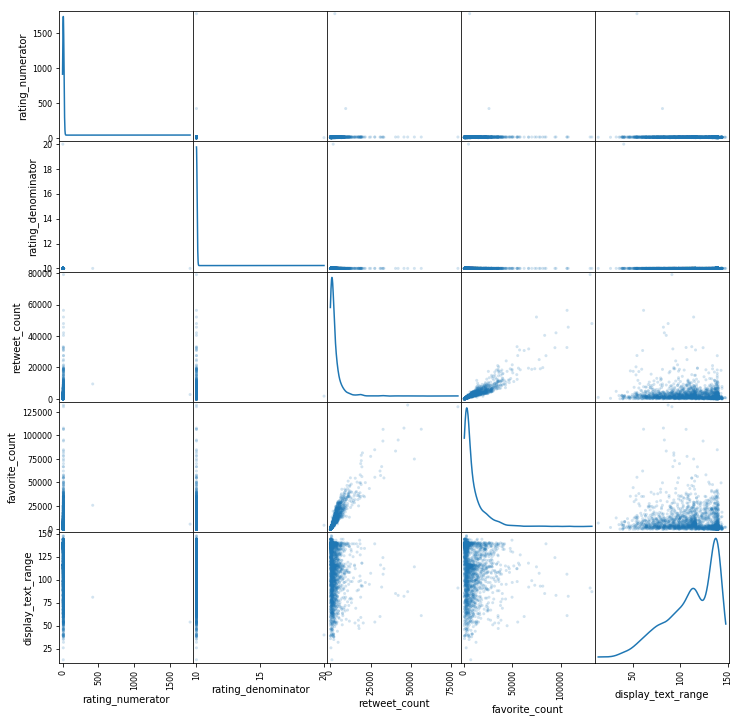

In [148]:
scatter_list = ['rating_numerator','rating_denominator','retweet_count','favorite_count','display_text_range']
# code
# Scatter Matrix Plot
from pandas.plotting import scatter_matrix
scatter_matrix(df[scatter_list], alpha=0.2, figsize=(12, 12), diagonal='kde');

## / word cloud

### // prepare word

In [149]:
df.text[:5]

time_index
2017-08-01 16:23:56                                                         This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
2017-08-01 00:17:27    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2017-07-31 00:18:03                     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
2017-07-30 15:58:51                                                               This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
2017-07-29 16:00:24    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [150]:
# 使用 sum 前要删除 null 值, 否则会报错
str_input = df.text.dropna()
str_input.isnull().sum()
# 聚合方式可以参考
# https://stackoverflow.com/questions/47465542/how-to-concatenate-all-string-values-in-a-given-pandas-dataframe-row-to-one-st

0

In [151]:
text_twitter = str_input.sum()
text_twitter[:1000]

'This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJUThis is Tilly. She\'s just checking pup on you. Hopes you\'re doing ok. If not, she\'s available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIVThis is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJBThis is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQThis is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7fHere we have a majestic great white breaching off South Africa\'s coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmhMeet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://

### // generate cloud

In [152]:
# 将图像转为 np 二维数据 (所以是png还是jpeg应该没有关系)
# read the mask / color image taken from
color3 = np.array(Image.open("t1.png"))
color4 = np.array(Image.open("t2.png"))

# 设置停用词
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("http")
stopwords.add("https")
stopwords.add("co")
stopwords.add("af")

In [153]:
# wordcloud 参数
wc = WordCloud(background_color="white", max_words=1000,
               stopwords=stopwords, max_font_size=40, random_state=42)

## https://github.com/amueller/word_cloud 
## git 中提供例子和cli(可以根据 text 和 pic 直接输出词云, 非常方便

In [154]:
wc.generate(text_twitter);

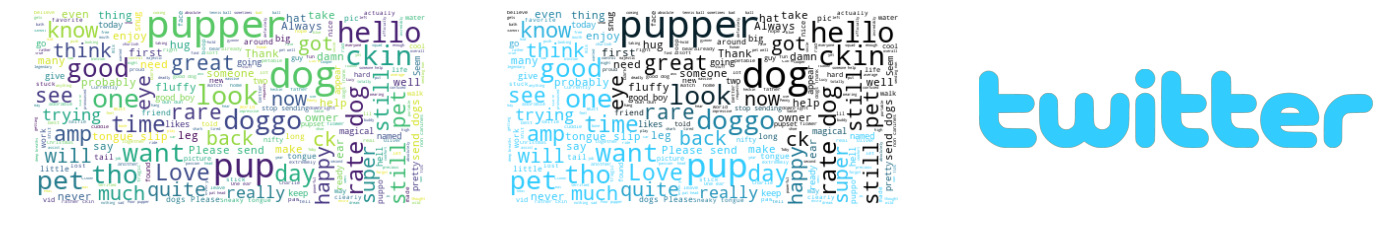

In [155]:
# create coloring from image
image_colors = ImageColorGenerator(color4)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# show
fig, axes = plt.subplots(1, 3, figsize=(24,4))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

In [156]:
# 增加 mask 蒙版系列
wc = WordCloud(background_color="white", max_words=1000, mask=color4,
               stopwords=stopwords, max_font_size=40, random_state=42)
wc.generate(text_twitter);

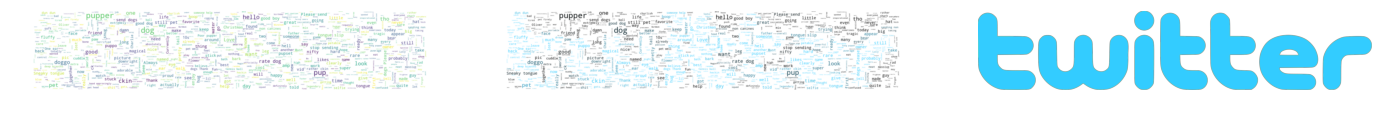

In [157]:
# create coloring from image
image_colors = ImageColorGenerator(color4)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# show
fig, axes = plt.subplots(1, 3, figsize=(24,4))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

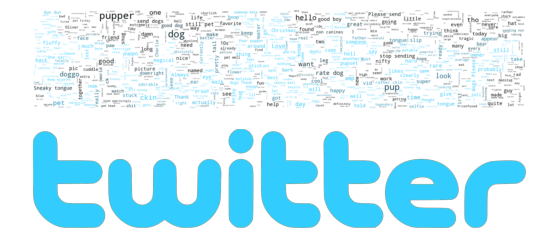

In [158]:
# 输出两个图像做对比
# show
fig, axes = plt.subplots(2, 1, figsize=(20,4))
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();
## 不是特别美观, 看来wordcloud如果使用mask和图像的样子关系很大

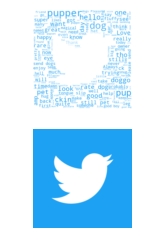

In [159]:
# 增加 mask 蒙版系列2
wc = WordCloud(background_color="white", max_words=200, mask=color3,
               stopwords=stopwords, max_font_size=40, random_state=42)
wc.generate(text_twitter);

# create coloring from image
image_colors = ImageColorGenerator(color3)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# 输出两个图像做对比
# show
fig, axes = plt.subplots(2, 1)
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color3, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();
## 不是特别美观, 看来wordcloud如果使用mask和图像的样子关系很大
### 大小和图片分辨率相同
### 遇到有的图片会报错
## 感觉对分词如果用 nltk 处理下可能会更好
### https://sqlshep.com/?p=971
# 更新! relative_scaling 参数特别重要(见结论图)

## / time series analysis
https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html

In [160]:
# check intervals
print("Dataframe shape: ", df.shape)
dt = (df.index[0] - df.index[-1])
print("Number of hours between start and end dates: ", dt.total_seconds()/3600 + 1)
dt

Dataframe shape:  (1980, 16)
Number of hours between start and end dates:  14994.863333333333


Timedelta('624 days 17:51:48')

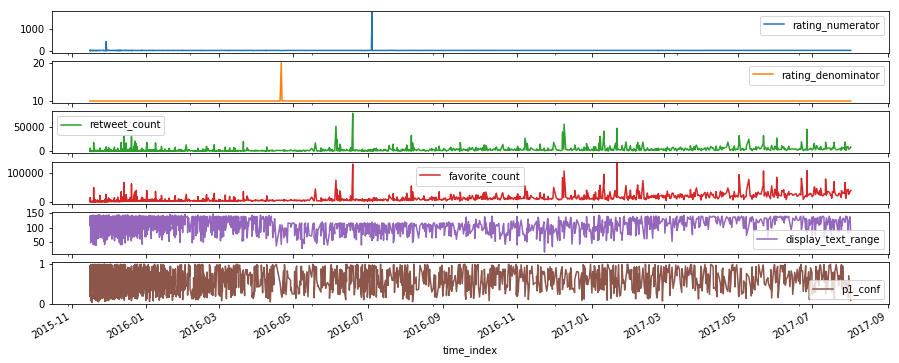

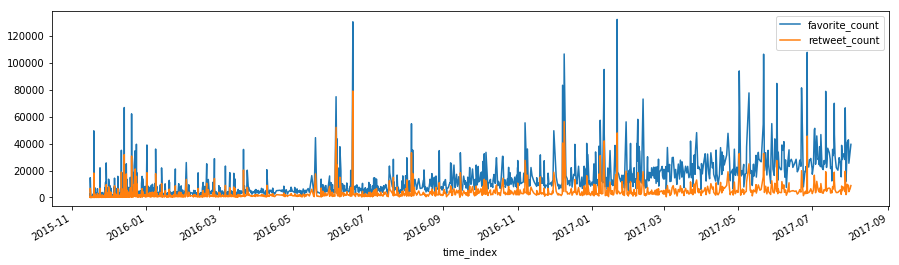

In [161]:
#df.plot(figsize=(15,4))
df.plot(subplots=True, figsize=(15,6))
df.plot(y=["favorite_count", "retweet_count"], figsize=(15,4));

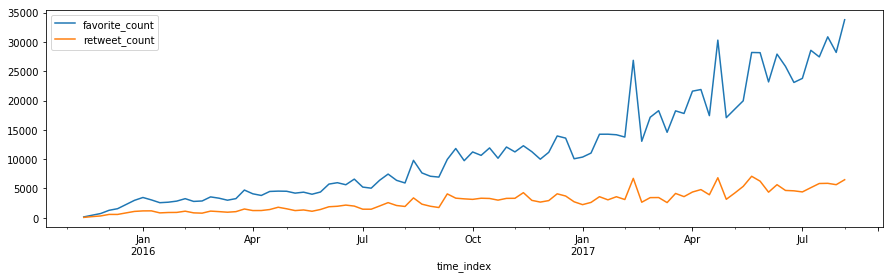

In [162]:
df[["favorite_count", "retweet_count"]].resample("1w").median().plot(figsize=(15,4));

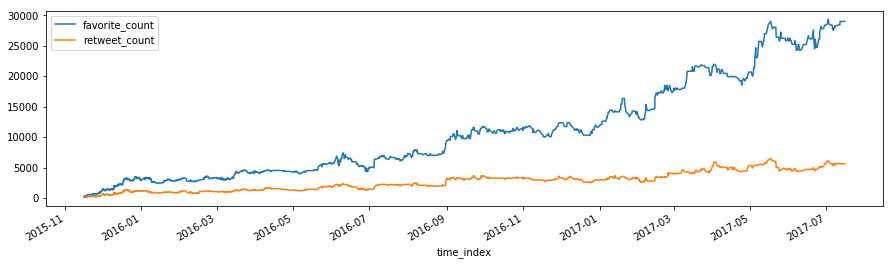

In [163]:
df[["favorite_count", "retweet_count"]].rolling(30).median().plot(figsize=(15,4));

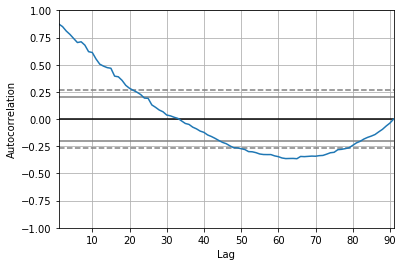

In [164]:
# 如果是周期的可以用这个(后续研究)
pd.plotting.autocorrelation_plot(df["favorite_count"].resample("1w").median());

## / sentiment analysis
- 使用sklearn https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
- 另外比较常见的是使用 nltk 库
- 此处先pass, 深度学习时候有空再深入

# 结论
## / favorite 和 retweet 时序分析
- 2016年上半年之前, favorite 数量大概是 retweet 的两倍
- 但再这之后, favorite 数量大量上涨, retweet 数量上涨十分缓慢(两者之比达到6倍)
- 推测相关因素如下:
    - 可以看出 twitter 增长非常迅速(可惜缺少用户量相关的数据)
    - 但是人们愿意付出更多一点时间 retweet 的时间在减少, 可能原因是当人接触到更多的 twitter 信息后, 能够 retweet 的注意力已经没有什么增长空间了(注意力处于饱和状态)

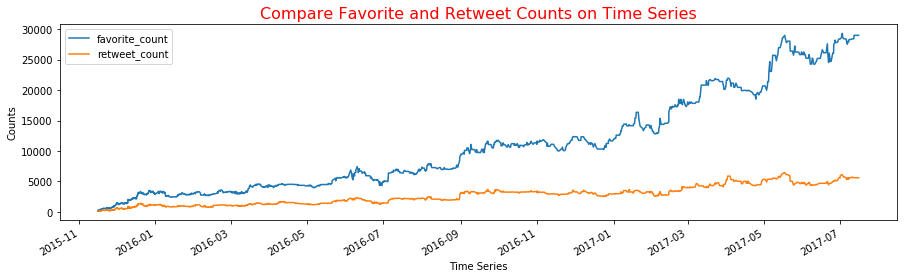

In [165]:
# 使用30天滚动平均值完成作图
df[["favorite_count", "retweet_count"]].rolling(30).median().plot(figsize=(15,4));
plt.xlabel('Time Series')
plt.ylabel('Counts')
plt.title('Compare Favorite and Retweet Counts on Time Series', color='r', fontsize=16);

## / favorate 和 retweet 相关性分析
- 分析中过滤掉了 retweet 为0的数据和大于1000的数据
- 此处考虑的是两个参数的对应关系, 和问题1的趋势并不冲突(因为数据做了过滤)
- 可以看出在 favorate 和 retweet 两个数据中间具有相关性
- 回归线要用到 sm 库或 sklearn 库, 后续研究 https://nbviewer.jupyter.org/github/weecology/progbio/blob/master/ipynbs/statistics.ipynb

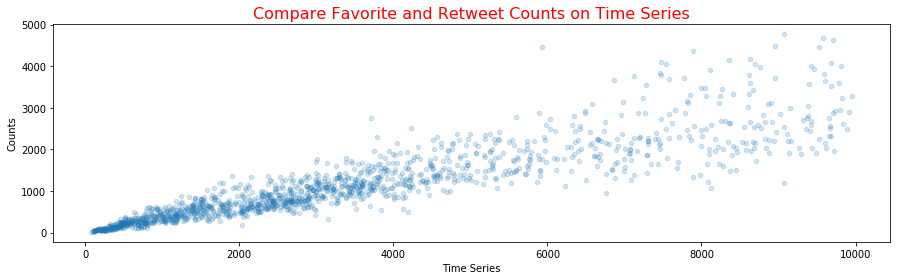

In [166]:
# 增加数据后，此图x，y需要再调整
df.query('0 < favorite_count < 10000').plot.scatter(x='favorite_count', y='retweet_count', alpha=0.2,figsize=(15,4));
plt.xlabel('Time Series')
plt.ylabel('Counts')
plt.title('Compare Favorite and Retweet Counts on Time Series', color='r', fontsize=16);

## / word cloud 分析
- 对评论使用 word cloud 进行分析
- 去掉了 stop words
- 图像为 twitter 英文字符(小鸟图不太美观)
- 可以从最后图看出来： 积极的词汇和对狗狗描述的词占比很大，这就标识 @dog_rate 在评论狗狗时绝大部分都会非常友好，让狗的主人很舒服，也逐渐带来了人气（包括他家特殊的评分系统）

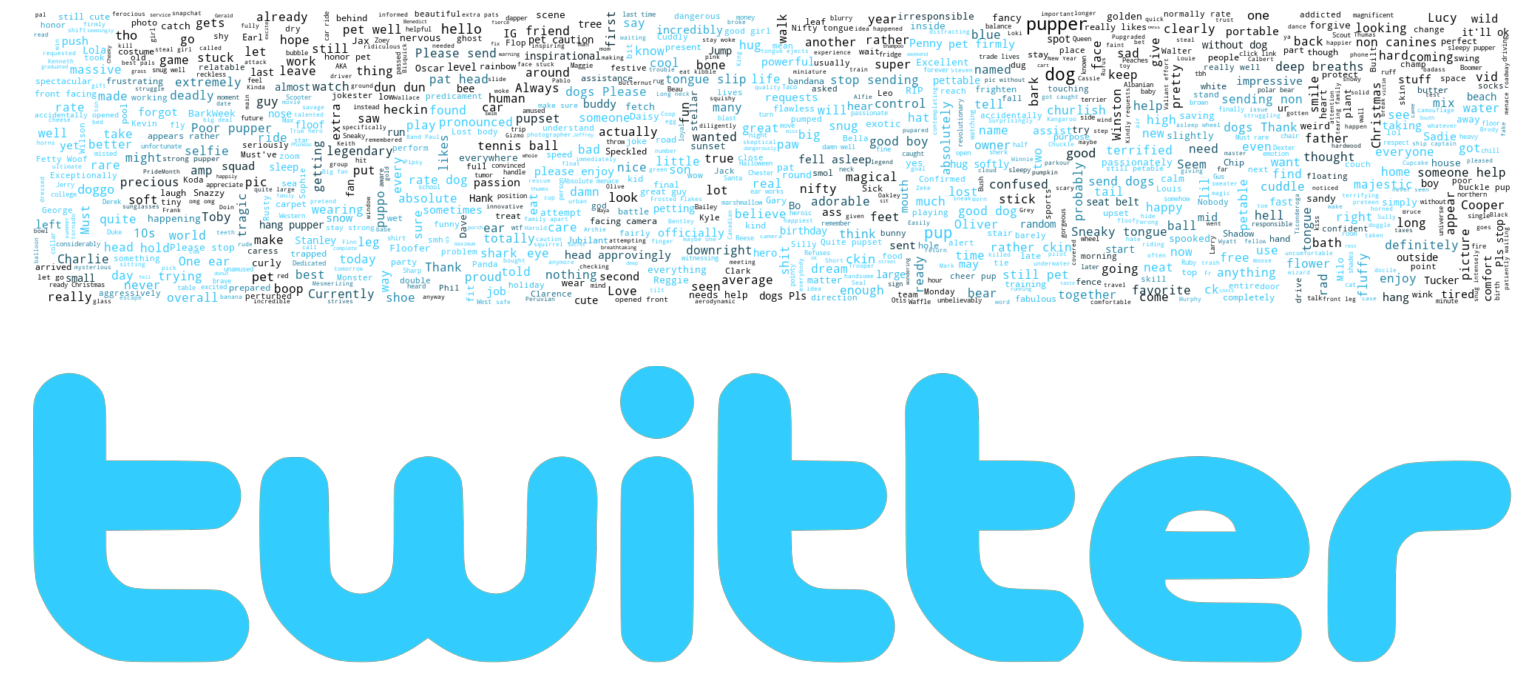

In [167]:
# set wc paras
wc = WordCloud(background_color="white", max_words=1000, mask=color4,
               stopwords=stopwords, max_font_size=24, relative_scaling=0.35, width=2400, height=800, random_state=42)

# gen wc
wc.generate(text_twitter);

# create coloring from image
image_colors = ImageColorGenerator(color4)

# gen pic
fig, axes = plt.subplots(2, 1,figsize=(36,12))
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

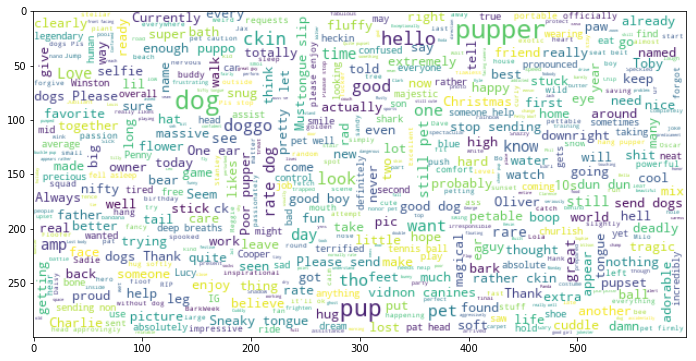

In [168]:
# set wc paras
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=24, width=600, height=300, random_state=42)

# gen wc
wc.generate(text_twitter)

fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.imshow(wc, interpolation="bilinear")
plt.show();

# 生成图像的清晰度和尺寸和 wc 的width，height与figsize 有关

## / text range 分析
- text range 改名为 text range 更为明确
- 数据做了过滤(过滤掉了个别 160 字符的)
- 数据有左偏斜趋势 (不能断定) 因为在140字的限制上有大量出现, 所以明显存在人为调整
- 有些数据超出了140
- 后续可以做异常值分析(按说不应该有超出, 也可能是正则化过滤时留下的问题)

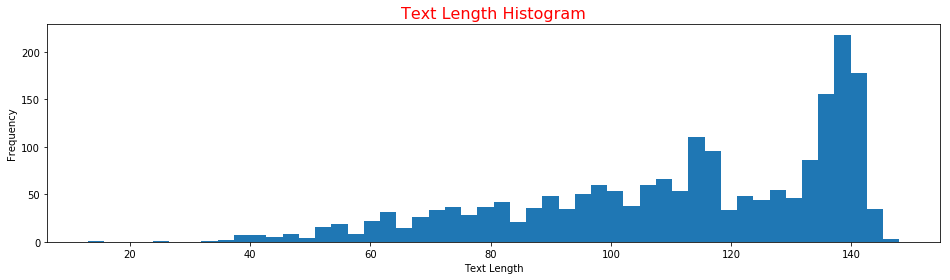

In [169]:
df.query('display_text_range < 150').display_text_range.plot.hist(bins=50,figsize=(16,4))
plt.xlabel('Text Length')
plt.title('Text Length Histogram', color='r', fontsize=16);

## / 后续完善
- 增加数据feature: 虽然原始数据 featrue 比较多, 但经过梳理发现所剩数据不多. 像用户日活, 注册量等信息缺失.
- 完善情感分析: 情感分析可以画出 积极/消极/主观/客观 两个维度的信息. 便于增加数据用以更多分析 (比如 140字的回复中, 是积极信息多还是消极信息多)
- 完善 source 分类数据: 本来很关注的feature, 因为数据收集的问题(可能是数据收集时ios比较好记录), 这点非常重要, 因为起码从尝试来讲 android 的不应该这么少. 这种情况会造成数据偏见, 可能带来错误的结论